In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import graphviz as gr

style.use("fivethirtyeight")

Question 1
Covariates

[Covariates only have effects on Y]

#Y = alpha + beta * X +e

a. fail to control Covariates 

$Y = a0 + b0 * X1+c0*X2+u$


x2 is Dummy varaible


b.controlled the Covariates 

$Y = a0 + b0 * X + c0* X2+ d0 * Covariates+u$


In [59]:
##n=100, without controlled covariates

np.random.seed(24)
n = 100

X1 = np.random.normal(0.3,2,n)
X2 = np.random.binomial(1, 0.5, n)

Y = np.random.normal (3 + 0.78*X1-0.05*X2).astype(int)

data = pd.DataFrame(dict(Y=Y,
                         X1=X1,
                         X2=X2))

data.to_csv("CO100.csv")

In [60]:
##n=1000, without controlled covariates

np.random.seed(24)
n = 1000

X1 = np.random.normal(0.3,2,n)
X2 = np.random.binomial(1, 0.5, n)

Y = np.random.normal (3 + 0.78*X1-0.05*X2).astype(int)

data = pd.DataFrame(dict(Y=Y,
                         X1=X1,
                         X2=X2))

data.to_csv("CO1000.csv")

In [64]:
##n=100, controlled covariates

np.random.seed(24)
n = 100

X1 = np.random.normal(0.3,2,n)
X2 = np.random.binomial(1, 0.5, n)
x3 = np.random.normal (3, 4, n)
###x is the covariates

Y = np.random.normal (3 + 0.78*X1-0.05*X2+0.9 * covariates).astype(int)

data = pd.DataFrame(dict(Y=Y,
                         X1=X1,
                         X2=X2,
                         x3=x3))

data.to_csv("CO100controlled.csv")

In [66]:
##n=100, controlled covariates


n = 1000

X1 = np.random.normal(0.3,2,n)
X2 = np.random.binomial(1, 0.5, n)
x3 = np.random.normal (3, 3, n)

Y = np.random.normal (3+0.78*X1-0.05*X2+0.9 * x3).astype(int)

data = pd.DataFrame(dict(Y=Y,
                         X1=X1,
                         X2=X2,
                         x3=x3))

data.to_csv("CO1000controlled.csv")

In [67]:
data = pd.read_csv("/Users/cwwa/Desktop/ECON 570/A2/CO100.csv")
data.head()

,Unnamed: 0,Y,X1,X2
0,0,6,2.958424,1
1,1,2,-1.240067,0
2,2,3,-0.332561,1
3,3,2,-1.681621,0
4,4,1,-1.841633,1


In [107]:
model = smf.ols('Y ~ X2', data=data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,17.4291,0.452,38.587,0.000,16.543,18.315
X2,-3.6122,0.954,-3.785,0.000,-5.485,-1.739


In [113]:
model_2 = smf.ols('Y ~ X1 + X2', data=data).fit()
model_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,18.7174,3.175,5.895,0.000,12.487,24.948
X1,-0.3223,0.786,-0.410,0.682,-1.865,1.221
X2,-3.5987,0.955,-3.767,0.000,-5.473,-1.724


In [68]:
data = pd.read_csv("/Users/cwwa/Desktop/ECON 570/A2/CO1000.csv")
data.head()

,Unnamed: 0,Y,X1,X2
0,0,3,2.958424,0
1,1,3,-1.240067,1
2,2,1,-0.332561,1
3,3,1,-1.681621,0
4,4,1,-1.841633,0


In [109]:
model = smf.ols('Y ~ X2', data=data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,17.4291,0.452,38.587,0.000,16.543,18.315
X2,-3.6122,0.954,-3.785,0.000,-5.485,-1.739


In [114]:
model_2 = smf.ols('Y ~ X1 + X2', data=data).fit()
model_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,18.7174,3.175,5.895,0.000,12.487,24.948
X1,-0.3223,0.786,-0.410,0.682,-1.865,1.221
X2,-3.5987,0.955,-3.767,0.000,-5.473,-1.724


In [71]:
data = pd.read_csv("/Users/cwwa/Desktop/ECON 570/A2/CO100controlled.csv")
data.head()

,Unnamed: 0,Y,X1,X2,x3
0,0,13,2.958424,1,8.680289
1,1,6,-1.240067,0,5.254420
2,2,11,-0.332561,1,7.912982
3,3,5,-1.681621,0,4.934774
4,4,3,-1.841633,1,3.129636


In [115]:
model = smf.ols('Y ~ x3', data=data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0369,0.077,90.871,0.000,6.885,7.189
x3,3.2608,0.016,203.496,0.000,3.229,3.292


In [116]:
model_2 = smf.ols('Y ~ X1 + X2 + x3', data=data).fit()
model_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.8624,0.266,22.034,0.000,5.340,6.385
X1,0.5068,0.065,7.752,0.000,0.379,0.635
X2,-3.9006,0.079,-49.126,0.000,-4.056,-3.745
x3,3.2667,0.009,378.606,0.000,3.250,3.284


In [72]:
data = pd.read_csv("/Users/cwwa/Desktop/ECON 570/A2/CO1000controlled.csv")
data.head()

,Unnamed: 0,Y,X1,X2,x3
0,0,4,0.632849,1,1.647548
1,1,4,-0.675703,0,2.284284
2,2,3,1.784299,0,-0.356082
3,3,4,-0.409387,0,2.458223
4,4,5,-1.807167,1,3.798917


In [79]:
model = smf.ols('Y ~ x3', data=data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.7769,0.080,34.794,0.000,2.620,2.933
x3,0.8630,0.019,45.260,0.000,0.826,0.900


In [117]:
model_2 = smf.ols('Y ~ X1 + X2 + x3', data=data).fit()
model_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.8624,0.266,22.034,0.000,5.340,6.385
X1,0.5068,0.065,7.752,0.000,0.379,0.635
X2,-3.9006,0.079,-49.126,0.000,-4.056,-3.745
x3,3.2667,0.009,378.606,0.000,3.250,3.284


In [118]:
###RSME



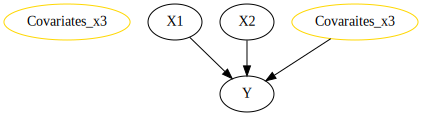

In [85]:
g = gr.Digraph()
g.node("Covariates_x3", color="gold")
g.edge("X1", "Y"),g.edge("X2", "Y"),g.edge("Covaraites_x3", "Y")
g.node("Covaraites_x3", color="gold")


g

Question 1 For real life example:
Y is 
Covaraites is t
X1 is 
X2 is 

Question 2 For real life example:
Y is the salary for people, Covaraites is the Intelligence for people.
X1 is Education level of people.
X2 is the dummy varaibel if people like their work or not.

x3 is the covariates affects the results of Y.

Question 2: Confounder


[Confounder both have effects to Y and X]

#Y = alpha + beta * X +e

a. fail to control Confounder 

$Y = a0 + b0 * X1+c0*X2+u$


x2 is Dummy varaible


b.controlled the Covariates 

$Y = a0 + b0 * X +c0*X2+ d0 * Covariates+u$
    
    

In [91]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import graphviz as gr

style.use("fivethirtyeight")

##n=100, without controlled confounder

np.random.seed(24)
n = 100

X1 = np.random.normal(4,0.5,n)
X2 = np.random.binomial(1, 0.23, n)

Y = np.random.normal (6 + 0.56 * X1- 4 *X2).astype(int)

data = pd.DataFrame(dict(Y=Y,
                         X1=X1,
                         X2=X2))

data.to_csv("Con100.csv")

In [93]:

##n=1000, without controlled confounder

np.random.seed(24)
n = 1000

X1 = np.random.normal(4,0.5,n)
X2 = np.random.binomial(1, 0.23, n)

Y = np.random.normal (6 + 0.56 * X1- 4 *X2).astype(int)

data = pd.DataFrame(dict(Y=Y,
                         X1=X1,
                         X2=X2))

data.to_csv("Con1000.csv")

In [97]:
##n=100, controlled confounder

np.random.seed(24)
n = 100

X1 = np.random.normal(4,0.5,n)
X2 = np.random.binomial(1, 0.23, n)
x3 = np.random.normal (3, 4, n)
###x3 is the confoudner

Y = np.random.normal (6 + 0.56 * X1- 4 *X2+3.3* x3).astype(int)

data = pd.DataFrame(dict(Y=Y,
                         X1=X1,
                         X2=X2,
                         x3=x3))

data.to_csv("Con100controlled.csv")

In [98]:
##n=1000, controlled confounder

np.random.seed(24)
n = 1000

X1 = np.random.normal(4,0.5,n)
X2 = np.random.binomial(1, 0.23, n)
x3 = np.random.normal (3, 4, n)
###x3 is the confoudner

Y = np.random.normal (6 + 0.56 * X1- 4 *X2+3.3 * x3).astype(int)

data = pd.DataFrame(dict(Y=Y,
                         X1=X1,
                         X2=X2,
                         x3=x3))

data.to_csv("Con1000controlled.csv")

In [99]:
data = pd.read_csv("/Users/cwwa/Desktop/ECON 570/A2/Con100.csv")
data.head()

,Unnamed: 0,Y,X1,X2
0,0,10,4.664606,0
1,1,8,3.614983,0
2,2,5,3.841860,1
3,3,8,3.504595,0
4,4,7,3.464592,0


In [120]:
model = smf.ols('Y ~ X2', data=data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,17.4291,0.452,38.587,0.000,16.543,18.315
X2,-3.6122,0.954,-3.785,0.000,-5.485,-1.739


In [121]:
model_2 = smf.ols('Y ~ X1 + X2 ', data=data).fit()
model_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,18.7174,3.175,5.895,0.000,12.487,24.948
X1,-0.3223,0.786,-0.410,0.682,-1.865,1.221
X2,-3.5987,0.955,-3.767,0.000,-5.473,-1.724


In [101]:
data = pd.read_csv("/Users/cwwa/Desktop/ECON 570/A2/Con1000.csv")
data.head()

,Unnamed: 0,Y,X1,X2
0,0,7,4.664606,0
1,1,9,3.614983,0
2,2,7,3.841860,0
3,3,7,3.504595,0
4,4,8,3.464592,0


In [122]:
model = smf.ols('Y ~ X2', data=data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,17.4291,0.452,38.587,0.000,16.543,18.315
X2,-3.6122,0.954,-3.785,0.000,-5.485,-1.739


In [124]:
model_2 = smf.ols('Y ~ X1 + X2 ', data=data).fit()
model_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,18.7174,3.175,5.895,0.000,12.487,24.948
X1,-0.3223,0.786,-0.410,0.682,-1.865,1.221
X2,-3.5987,0.955,-3.767,0.000,-5.473,-1.724


In [103]:
data = pd.read_csv("/Users/cwwa/Desktop/ECON 570/A2/Con100controlled.csv")
data.head()

,Unnamed: 0,Y,X1,X2,x3
0,0,37,4.664606,0,8.680289
1,1,25,3.614983,0,5.254420
2,2,31,3.841860,1,7.912982
3,3,23,3.504595,0,4.934774
4,4,17,3.464592,0,3.129636


In [125]:
model = smf.ols('Y ~ x3', data=data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0369,0.077,90.871,0.000,6.885,7.189
x3,3.2608,0.016,203.496,0.000,3.229,3.292


In [126]:
model_2 = smf.ols('Y ~ X1 + X2 + x3', data=data).fit()
model_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.8624,0.266,22.034,0.000,5.340,6.385
X1,0.5068,0.065,7.752,0.000,0.379,0.635
X2,-3.9006,0.079,-49.126,0.000,-4.056,-3.745
x3,3.2667,0.009,378.606,0.000,3.250,3.284


In [105]:
data = pd.read_csv("/Users/cwwa/Desktop/ECON 570/A2/Con1000controlled.csv")
data.head()

,Unnamed: 0,Y,X1,X2,x3
0,0,-1,4.664606,0,-2.390197
1,1,40,3.614983,0,9.848224
2,2,7,3.841860,0,0.037156
3,3,13,3.504595,0,1.999726
4,4,20,3.464592,0,4.073230


In [106]:
model = smf.ols('Y ~ x3', data=data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0369,0.077,90.871,0.000,6.885,7.189
x3,3.2608,0.016,203.496,0.000,3.229,3.292


In [127]:
model_2 = smf.ols('Y ~ X1 + X2 + x3', data=data).fit()
model_2.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.8624,0.266,22.034,0.000,5.340,6.385
X1,0.5068,0.065,7.752,0.000,0.379,0.635
X2,-3.9006,0.079,-49.126,0.000,-4.056,-3.745
x3,3.2667,0.009,378.606,0.000,3.250,3.284


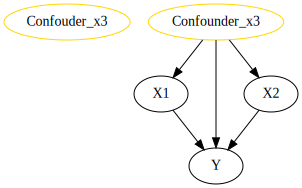

In [90]:
g = gr.Digraph()
g.node("Confouder_x3", color="gold")
g.edge("X1", "Y"),g.edge("X2", "Y"),g.edge("Confounder_x3", "Y"),g.edge("Confounder_x3", "X1"),g.edge("Confounder_x3", "X2")
g.node("Confounder_x3", color="gold")


g

Question 2 For real life example:
Y is the salary for people, Covaraites is the Intelligence for people.
X1 is Education level of people.
X2 is the dummy varaibel if people like their work or not.


Question 3 :selection bias
    
    
[Selection bias means X has some bad effects in the casual inference]

#Y = alpha + beta * X +e

a. fail to control Confounder 

b.controlled the Covariates 


    

In [128]:
import pandas as pd
import numpy as np

np.random.seed(24)
n = 100
email = np.random.binomial(1, 0.5, n)

credit_limit = np.random.gamma(6, 200, n)
risk_score = np.random.beta(credit_limit, credit_limit.mean(), n)

opened = np.random.normal(5 + 0.001*credit_limit - 4*risk_score, 2)
opened = (opened > 4).astype(float) * email


agreement = np.random.normal(30 +(-0.003*credit_limit - 10*risk_score), 7) * 2 * opened
agreement = (agreement > 40).astype(float)

payments = (np.random.normal(500 + 0.16*credit_limit - 40*risk_score + 11*agreement + email, 75).astype(int) // 10) * 10

data = pd.DataFrame(dict(payments=payments,
                         email=email,
                         opened=opened,
                         agreement=agreement,
                         credit_limit=credit_limit,
                         risk_score=risk_score))

data.to_csv("email100.csv")

In [129]:
import pandas as pd
import numpy as np

np.random.seed(24)
n = 1000
email = np.random.binomial(1, 0.5, n)

credit_limit = np.random.gamma(6, 200, n)
risk_score = np.random.beta(credit_limit, credit_limit.mean(), n)

opened = np.random.normal(5 + 0.001*credit_limit - 4*risk_score, 2)
opened = (opened > 4).astype(float) * email


agreement = np.random.normal(30 +(-0.003*credit_limit - 10*risk_score), 7) * 2 * opened
agreement = (agreement > 40).astype(float)

payments = (np.random.normal(500 + 0.16*credit_limit - 40*risk_score + 11*agreement + email, 75).astype(int) // 10) * 10

data = pd.DataFrame(dict(payments=payments,
                         email=email,
                         opened=opened,
                         agreement=agreement,
                         credit_limit=credit_limit,
                         risk_score=risk_score))

data.to_csv("email1000.csv")

In [130]:
data = pd.read_csv("/Users/cwwa/Desktop/ECON 570/A2/email100.csv")
data.head()

,Unnamed: 0,payments,email,opened,agreement,credit_limit,risk_score
0,0,550,1,0.0,0.0,1064.583112,0.465057
1,1,740,1,1.0,0.0,2051.019743,0.628039
2,2,520,1,0.0,0.0,773.993923,0.388495
3,3,930,0,0.0,0.0,2362.617255,0.653442
4,4,720,0,0.0,0.0,1057.000671,0.473908


In [132]:
email_1 = smf.ols('payments ~ email + credit_limit + risk_score', data=data).fit()
email_1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,517.9992,21.603,23.978,0.000,475.606,560.392
email,10.6598,4.701,2.268,0.024,1.435,19.884
credit_limit,0.1744,0.018,9.703,0.000,0.139,0.210
risk_score,-126.2032,84.942,-1.486,0.138,-292.889,40.482


In [134]:
email_2 = smf.ols('payments ~ email + credit_limit + risk_score + opened + agreement', data=data).fit()
email_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,515.6607,21.636,23.833,0.000,473.203,558.118
email,10.8056,5.838,1.851,0.064,-0.651,22.263
credit_limit,0.1739,0.018,9.676,0.000,0.139,0.209
risk_score,-120.2882,85.005,-1.415,0.157,-287.098,46.521
opened,-11.4226,9.049,-1.262,0.207,-29.180,6.335
agreement,17.3811,9.578,1.815,0.070,-1.415,36.177


In [131]:
data = pd.read_csv("/Users/cwwa/Desktop/ECON 570/A2/email1000.csv")
data.head()

,Unnamed: 0,payments,email,opened,agreement,credit_limit,risk_score
0,0,600,1,1.0,0.0,635.808773,0.364162
1,1,800,1,0.0,0.0,1883.186365,0.616126
2,2,770,1,1.0,1.0,1644.876719,0.580663
3,3,560,0,0.0,0.0,836.434665,0.416654
4,4,790,0,0.0,0.0,1677.996148,0.594648


In [133]:
email_1 = smf.ols('payments ~ email + credit_limit + risk_score', data=data).fit()
email_1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,517.9992,21.603,23.978,0.000,475.606,560.392
email,10.6598,4.701,2.268,0.024,1.435,19.884
credit_limit,0.1744,0.018,9.703,0.000,0.139,0.210
risk_score,-126.2032,84.942,-1.486,0.138,-292.889,40.482


In [135]:
email_2 = smf.ols('payments ~ email + credit_limit + risk_score + opened + agreement', data=data).fit()
email_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,515.6607,21.636,23.833,0.000,473.203,558.118
email,10.8056,5.838,1.851,0.064,-0.651,22.263
credit_limit,0.1739,0.018,9.676,0.000,0.139,0.209
risk_score,-120.2882,85.005,-1.415,0.157,-287.098,46.521
opened,-11.4226,9.049,-1.262,0.207,-29.180,6.335
agreement,17.3811,9.578,1.815,0.070,-1.415,36.177


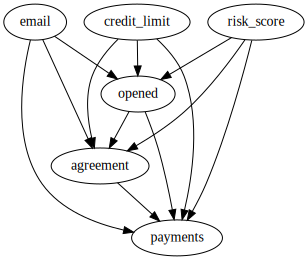

In [136]:
g = gr.Digraph()

g.edge("email", "payments")
g.edge("email", "opened")
g.edge("email", "agreement")
g.edge("opened", "payments")
g.edge("opened", "agreement")
g.edge("agreement", "payments")

g.edge("credit_limit", "payments")
g.edge("credit_limit", "opened")
g.edge("credit_limit", "agreement")
g.edge("risk_score", "payments")
g.edge("risk_score", "opened")
g.edge("risk_score", "agreement")

g

Real life connection:
selection bias shows the wrong relationship from X with Y. It will affects that the correctness for the regression model. 
if the Y is the salary for people, T is the education, and white dollar is the selection bias for selecting x to esmitae Y.